# 新型コロナウィルス感染症(CoVid-19)拡大状況を可視化・分析してみる（国内編）

# モジュールのインポートとデータの読み込み
まずは必要なモジュールをインポートする．

In [ ]:
# 必要なモジュールのインポート
import numpy as np # 行列計算
import pandas as pd # データベース
from matplotlib import pyplot as plt, dates as mdates # グラフ描画
import datetime # 日付

# 県別のCoVid-19感染状況を可視化する
我が国でCoVid-19感染状況をインタラクティブに可視化したサイトとしては，下記のようなものがある：
- [ 新型コロナウィルス感染症対策](https://corona.go.jp/dashboard/)  | 内閣府
- [新型コロナウィルス 国内感染の状況](https://toyokeizai.net/sp/visual/tko/covid19/) | 東洋経済オンライン
- [COVID-19 Japan](https://www.stopcovid19.jp)
- [COVID-19 感染予測](https://datastudio.google.com/s/uz6oVKSvn_0) | Google
- [新型コロナウイルス感染速報](https://covid-2019.live)
- [東京都新型コロナウィルス感染症対策サイト](https://stopcovid19.metro.tokyo.lg.jp)
- [新型コロナウィルス](https://www3.nhk.or.jp/news/special/coronavirus/data-widget/) | NHK 特設サイト

## 県別データについて
データ分析の練習として，県別の新型コロナウィルス感染症（CoVid19)の感染状況を可視化してみよう．データソースとしては[内閣府](https://corona.go.jp/dashboard/)や[厚生労働省](https://www.mhlw.go.jp/stf/seisakunitsuite/bunya/0000164708_00001.html)の情報を使いたいところだが，

- 毎日の県別の検査陽性者と死亡者数

という，ごくシンプル（かつ明らかに重要な）情報が整理されているものが見つけられない[<sup>1</sup>](#fn1)． 

2021年に入るまでは[東洋経済オンラインの荻原氏](https://toyokeizai.net/sp/visual/tko/covid19/)が[整理したもの](https://github.com/kaz-ogiwara/covid19)を使うことができたが，1月から更新が停止されている．

そこで，同サイトにある
https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv
を読み込んで利用することにしよう．

---
<span id="fn1"> [1]</span> 厚生省の[サイト](https://www.mhlw.go.jp/stf/covid-19/kokunainohasseijoukyou.html#h2_1)を見ると， Excel の数値を画像にしたものが公開されていたり， 規則性のない URL をもつ PDF が置かれていたりして，正直ゲンナリする． 効率的な対策のためには，国内・地域別の感染者推移の見通しよい把握が必要不可欠であるにも関わらず，CoVid-19拡大開始から1年以上も経つのに，「情報後進国」ぶりが一向に改善される見通しがない． 本講義の受講生は，適切な情報リテラシーを身につけて欲しい．

## データの読み込み
県別の陽性者数，入院者数，退院者数および死亡者数を各県，各日について整理した以下のデータ：

https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv

これを Colab に取り込むには，上記のURLを [`pandas.read_csv`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)の引数に与える．　例えば，`jp_df` というデータフレームに上記データを読み込むには，

```python
fname = "https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv"
jp_df = pd.read_csv(fname)
```

とする．読み込んだ後は，分かりやすくするために，次のように列名を変更しておこう：

|    |    |     |    |    |     |    |    |    |  |    |    |   |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 元の列名 | year | month | date | prefectureNameJ | prefectureNameE | testedPositive | peopleTested |hospitalized | serious | discharged | deaths |effectiveReproductionNumber |
| 変更後の列名 | 年 |　月 | 日 | 都道府県 | Pref |陽性数 | 検査数 | 入院数 | 重症数 | 退院数 | 死亡数 | 実効再生産数 |

列名の変更は， 以下のようにして`jp_df`の[`.columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)属性を直接書き換えればいい．

```python
jp_df.columns = [ "年", "月" , "日", "都道府県", "Pref", "陽性数", "検査数", "入院数", "重症数", "退院数", "死亡数", "実効再生産数"]
```


In [ ]:
# ファイルを読み込み，列名を使いやすい形に修正
fname = 'https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv'
jp_df = pd.read_csv(fname, dtype=str)
jp_df.columns = [ "年", "月" , "日", "都道府県", "Pref", "陽性数", "検査数", "入院数", "重症数", "退院数", "死亡数", "実効再生産数"]
jp_df # jp_df の外観を表示

,年,月,日,都道府県,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
0,2020,2,8,東京都,Tokyo,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2,8,神奈川県,Kanagawa,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2,9,東京都,Tokyo,3,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,9,神奈川県,Kanagawa,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2,10,東京都,Tokyo,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20201,2021,5,12,熊本県,Kumamoto,4914,69306.0,691.0,18,4140.0,83,1.75
20202,2021,5,12,大分県,Oita,2590,123713.0,682.0,3,1878.0,30,1.3
20203,2021,5,12,宮崎県,Miyazaki,2697,35075.0,457.0,5,2207.0,25,3.78
20204,2021,5,12,鹿児島県,Kagoshima,2710,89488.0,436.0,4,2213.0,28,1.13


## データの整形
こうして読み込んだデータは，年，月，日がそれぞれ別の列になっているため，そのままでは若干使いづらい．そこで，この3つの列を統合し，日付を[`datetime`型](https://docs.python.org/3/library/datetime.html)に置き換えたものを「年月日」という列に置き換える．さらに，使いやすさを向上させるため，都道府県名を第0インデックス，年月日を第1インデックスとする[マルチインデックス](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)にしておこう．

若干テクニカルなので，詳細に踏み込みたくない人は，下記のセルを **おまじない** として実行すること．

In [ ]:
# 都道府県名以外の全てのセルを整数値に変換する
for c in jp_df.columns:
    if c in ["都道府県", "Pref"]: # 都道府県名のデータは文字型として扱う
        jp_df[c] = jp_df[c].astype(str)
    else:
        jp_df[c] = pd.to_numeric(jp_df[c], errors='coerce') # 都道府県名以外のデータは数値として扱う
        jp_df[c] = jp_df[c].fillna(0) # データが欠損している部分を0で埋める
        jp_df[c] = jp_df[c].astype(float) # 一旦は実数型に変換する 
        if c not in ["実効再生産数"]: # 実効再生産数以外のデータは整数型として扱う
            jp_df[c] = jp_df[c].astype(int)

# 年月日の列からdatetime型のインデックスを生成する
jp_df["年月日"] = pd.to_datetime(jp_df[["年", "月", "日"]].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
# 都道府県名と年月日からなるマルチインデックスを構築
jp_df = jp_df.set_index(["都道府県", "年月日"])
jp_df # jp_df の概観を表示

,,年,月,日,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
都道府県,年月日,,,,,,,,,,,
東京都,2020-02-08,2020,2,8,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-08,2020,2,8,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-09,2020,2,9,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-09,2020,2,9,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-10,2020,2,10,Tokyo,3,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
熊本県,2021-05-12,2021,5,12,Kumamoto,4914,69306,691,18,4140,83,1.75
大分県,2021-05-12,2021,5,12,Oita,2590,123713,682,3,1878,30,1.30
宮崎県,2021-05-12,2021,5,12,Miyazaki,2697,35075,457,5,2207,25,3.78


# 県別データの可視化


## 県別のデータフレームの作成
データフレーム`jp_df`の特定の列や行の情報にアクセスするには，

In [ ]:
confirmed = jp_df["陽性数"] # 陽性数の列のデータを confirmed という変数に格納
pref_df = jp_df.loc["宮城県"] # 最初のインデックスが宮城県である行にアクセス

In [ ]:
pref_df

,年,月,日,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
年月日,,,,,,,,,,,
2020-03-11,2020,3,11,Miyagi,1,94,0,0,0,0,0.00
2020-03-12,2020,3,12,Miyagi,1,100,0,0,0,0,0.00
2020-03-13,2020,3,13,Miyagi,1,109,0,0,0,0,0.00
2020-03-14,2020,3,14,Miyagi,1,109,0,0,0,0,0.00
2020-03-15,2020,3,15,Miyagi,1,109,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-08,2021,5,8,Miyagi,8307,124281,426,8,7789,72,1.17
2021-05-09,2021,5,9,Miyagi,8339,124669,435,9,7810,72,1.00
2021-05-10,2021,5,10,Miyagi,8353,124673,425,11,7846,74,0.94


などとする．列名やインデックス名は**文字列**であるため，ダブルクォート(`"`)もしくはシングルクォート(`'`)のペアで囲む必要があることに注意されたい．
上のセルを実行すると，宮城県だけのデータで構成された`pref_df`というデータフレームが構築される．`"宮城県"` の部分には，47都道府県名を設定できる．
次のセルを適切に修正し，自分の出身県（留学生については「東京都」でよい）のデータフレームを作ってみよう．

In [ ]:
pref_df = jp_df.loc["宮城県"] # 県別データフレームを作成
pref_df.head() # 県別データフレームを表示(長いので最初の5行だけ)

,年,月,日,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
年月日,,,,,,,,,,,
2020-03-11,2020,3,11,Miyagi,1,94,0,0,0,0,0.0
2020-03-12,2020,3,12,Miyagi,1,100,0,0,0,0,0.0
2020-03-13,2020,3,13,Miyagi,1,109,0,0,0,0,0.0
2020-03-14,2020,3,14,Miyagi,1,109,0,0,0,0,0.0
2020-03-15,2020,3,15,Miyagi,1,109,0,0,0,0,0.0


In [ ]:
pref_df["陽性数"]

年月日
2020-03-11       1
2020-03-12       1
2020-03-13       1
2020-03-14       1
2020-03-15       1
              ... 
2021-05-08    8307
2021-05-09    8339
2021-05-10    8353
2021-05-11    8361
2021-05-12    8439
Name: 陽性数, Length: 428, dtype: int64

県別データフレームの特定の列にアクセスするには，`pref_df[列名]`とする（列名は**文字列**であるため，ダブルクォートもしくはシングルクォートのペアで囲む必要があることに注意）．

例えば，次のセルを実行すると，`conf`, `disc`, `dead`の3つの変数に，それぞれ，陽性数，退院数，死亡数の各列に対応する**シリーズ**が代入される．

In [ ]:
conf = pref_df["陽性数"] # 陽性と確定した者(confirmed)
disc = pref_df["退院数"] # 退院者(discharged)
dead = pref_df["死亡数"] # 死亡者(dead)
conf # 陽性者数を表示（長いので最初の5行だけ）．

年月日
2020-03-11       1
2020-03-12       1
2020-03-13       1
2020-03-14       1
2020-03-15       1
              ... 
2021-05-08    8307
2021-05-09    8339
2021-05-10    8353
2021-05-11    8361
2021-05-12    8439
Name: 陽性数, Length: 428, dtype: int64

## 累積陽性数/死亡数
こうして得られた県別データを「Colabグラフ描画」で説明した `matplotlib.pyplot.plot`関数などに与えれば，県別感染状況を可視化できる．なお，`plot`関数に[`pandas.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)を与えると，各行の**インデックス**をx軸，各行の値をy軸とした折れ線グラフをプロットしてくれる（x軸/y軸をわざわざ与える必要がない）．

プロットしたグラフは savefig 関数を使って保存しておこう。

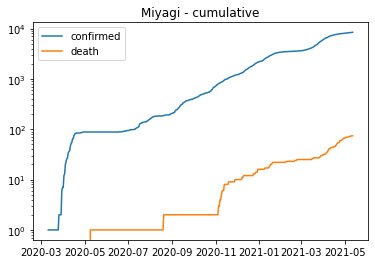

In [ ]:
plt.plot(conf, label="confirmed") # 陽性者
plt.plot(dead, label="death") # 死亡者
plt.yscale('log') # y軸を対数で表示
plt.legend() # 凡例を表示
plt.title(pref_df["Pref"][0] + " - cumulative") # "Pref"列の第0要素（先頭要素）をタイトルとして表示
plt.savefig('Miyagi.pdf') # savefig 関数を使ってグラフを保存（plt.show()の前に呼ぶこと）
plt.savefig('Miyagi.png') # savefig 関数を使ってグラフを保存（plt.show()の前に呼ぶこと

plt.show()

横軸に日付をずらりと表示するとゴチャゴチャするので，[`matplotlib.dates`](https://matplotlib.org/3.1.1/api/dates_api.html)を使って，**主目盛り**と**副目盛り**を，それぞれ，月単位および週単位にする．さらに，この操作は何度も使うので，`fancy_ax`というオリジナルの**関数**として定義しておく．

ここは若干テクニカルなので，詳細に踏み込みたくない人は**おまじない**だと思って，とにかく使っていこう．

In [ ]:
#
# x軸の目盛りの見栄えを修正する関数を定義する
#
def fancy_ax(ax):
#    ax = plt.gca() # 現在表示されているグラフのx/y軸を取得
    ## x軸の主目盛りを修正
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.8) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=45)
    #ax.set_xticklabels(, minor=False)
    ## x軸の副目盛りを修正
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator()) # 副目盛りを週ごとに設定
    ax.grid(which='minor', axis='x', linestyle='--') # 副目盛りのグリッドの線種を点線にする
    return ax

こうして定義された `fancy_ax`関数を現在表示されているグラフに適用するには，[`matplotlib.pyplot.gca`**関数**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html)の戻り値を`fancy_ax`の引数に与える．

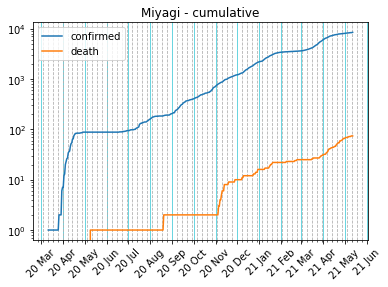

In [ ]:
plt.plot(conf, label="confirmed") # 陽性者
plt.plot(dead, label="death") # 死亡者
plt.yscale('log') # y軸を対数で表示
plt.legend() # 凡例を表示
plt.title(pref_df["Pref"][0] + " - cumulative") # "Pref"列の第0要素（先頭要素）をタイトルとして表示
ax = fancy_ax(plt.gca()) # 現在表示されているグラフに fancy_ax を適用する

## 日次新規陽性数/死亡数
一日あたりの新規増加数をプロットしたい場合は，各シリーズに`.diff()`関数を適用する．次のセルでは，日々の新規感染者数と死亡者数を，[`pyplot.fill_between`関数](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html)を用いてプロットしている．

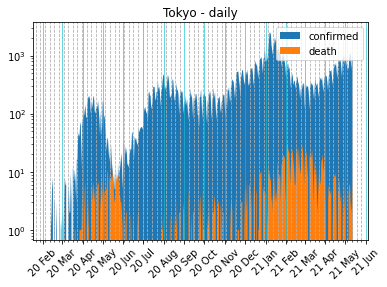

In [ ]:
# 県別データフレームを作成
pref = "東京都"
pref_df = jp_df.loc[pref] # 当該県データのみのデータフレームを構築
# 陽性数と死亡数を取得
conf = pref_df["陽性数"] # 陽性と確定した者(confirmed)
dead = pref_df["死亡数"] # 死亡者(dead)

# 新規件数をプロット
plt.fill_between(conf.index, conf.diff(), label="confirmed") # 陽性者
plt.fill_between(dead.index, dead.diff(), label="death") # 死亡者
plt.yscale('log') # y軸を対数で表示
pref_df

ax = fancy_ax(plt.gca()) # ｘ軸の見栄えを整える

# グラフのタイトルと凡例を表示
plt.title(pref_df["Pref"][0] + " - daily") # "Pref"列の第0要素（先頭要素）をタイトルとして表示
plt.legend() # 凡例を表示
plt.show()

日次データは変動が激しい上に曜日の影響を受けやすい（土日は検査がないので報告症例数が小さくなりがち）ためにトレンドを掴みづらい．そこで，[`rolling`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)と[`mean`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)を使って，7日間平均をとってみよう．`conf.diff()`に対して`rolling(7).mean()`を行うと，次のようなデータが作られる．

|年月日|`conf.diff()`|`conf.diff().rolling(7).mean()`| 
|---|---|---|
|2020-03-12|     2.0| NaN （データなし）| 
|2020-03-13|     2.0|NaN |
|2020-03-14|    10.0|NaN |
|2020-03-15|     3.0|NaN |
|2020-03-16|     0.0|NaN |
|2020-03-17|   12.0|NaN |
|2020-03-18|     9.0|  5.428571 （3/12-18の7日間の平均値）|
|2020-03-19|     7.0| 6.142857 (3/13-19の平均値)|
|2020-03-20|    11.0| 7.428571 (3/14-20の平均値)|

次のセルでは，陽性数と死亡数のそれぞれの7日間移動平均をプロットしている．

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


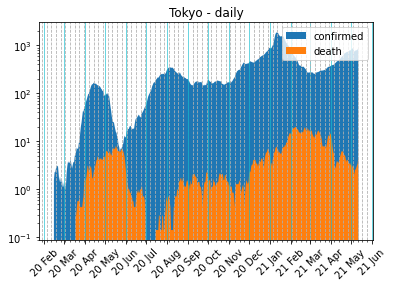

In [ ]:
# 県別データフレームを作成
pref = "東京都"
pref_df = jp_df.loc[pref] # 当該県データのみのデータフレームを構築
# 陽性数と死亡数を取得
conf = pref_df["陽性数"] # 陽性と確定した者(confirmed)
dead = pref_df["死亡数"] # 死亡者(dead)

# 日次新規件数（の7日間移動平均）をプロット
W = 7 # 移動平均を取る日数
plt.fill_between(conf.index, conf.diff().rolling(W).mean(), label="confirmed") # 陽性者
plt.fill_between(dead.index, dead.diff().rolling(W).mean(), label="death") # 死亡者
plt.yscale('log') # y軸を対数軸で表示
plt.ylim(0,) # y軸の表示下限を0にする

ax = fancy_ax(plt.gca()) # ｘ軸の見栄えを整える

# グラフのタイトルと凡例を表示
plt.title(pref_df["Pref"][0] + " - daily") # "Pref"列の第0要素（先頭要素）をタイトルとして表示
plt.legend() # 凡例を表示
plt.show()

## 陽性数/死亡数の累積件数と日次新規件数
累積件数と日々の新規件数を並べてプロットしてみよう．次のセルでは，日々の新規件数を描画する`fill_between`関数に `alpha=0.25` というオプションを指定して透過している．

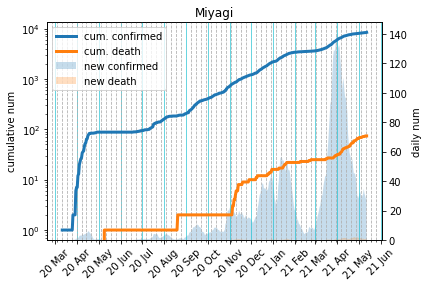

In [ ]:
# 県別データフレームを作成
pref = "宮城県"
pref_df = jp_df.loc[pref] # 当該県データのみのデータフレームを構築
# 陽性数と死亡数を取得
conf = pref_df["陽性数"] # 陽性と確定した者(confirmed)
dead = pref_df["死亡数"] # 死亡者(dead)

# y1軸に累積件数をプロット
plt.plot(conf, label="cum. confirmed", linewidth=3)
plt.plot(dead, label="cum. death", linewidth=3)
ax1 = plt.gca()
ax1.set_yscale('log') # y1軸を対数スケールにする
ax1.set_ylabel("cumulative num") # y1軸のラベル

# y2軸に日次新規件数（の7日間移動平均）をプロット
ax2 = plt.twinx(ax1) # x2/y2軸を用意する
W = 7 # 移動平均を取る日数
ax2.fill_between(conf.index, conf.diff().rolling(W).mean(), label="new confirmed", alpha=0.25) # 陽性者
ax2.fill_between(dead.index, dead.diff().rolling(W).mean(), label="new death", alpha=0.25) # 死亡者
ax2.set_yscale('linear') # y2軸を線形スケールにする
ax2.set_ylim(0,) # y2軸の表示下限を0にする
ax2.set_xticks([]) # x2軸は表示しない
ax2.set_ylabel("daily num") # y2軸のラベル

# y1軸をy2軸の上に表示させる（おまじない）
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
ax1 = fancy_ax(ax1) # ｘ1軸の見栄えを整える

# グラフのタイトルと凡例を表示
ax1.set_title(pref_df["Pref"][0]) # "Pref"列の第0要素（先頭要素）をタイトルとして表示
h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
ax1.legend(h1+h2, l1+l2, loc='upper left') # ax1軸とax2軸の凡例を一緒に出力するおまじない
plt.show()

# 県別死亡者数ヒストグラム 
直近の死亡者数の県別ヒストグラムを描くには，ちょっとマニアックな方法を使う．次のセルでは，以下を行っている：
1. 各県について，英語の県名と最終日の死亡者数のみで構成されたデータフレーム `ltd_df` を構築する
2. `ltd_df` のインデクスを英語の県名に置き換える
3. `ltd_df` を死亡数の大きい順に並べ替える
4. `pyplot.bar`関数を用いて棒グラフを表示

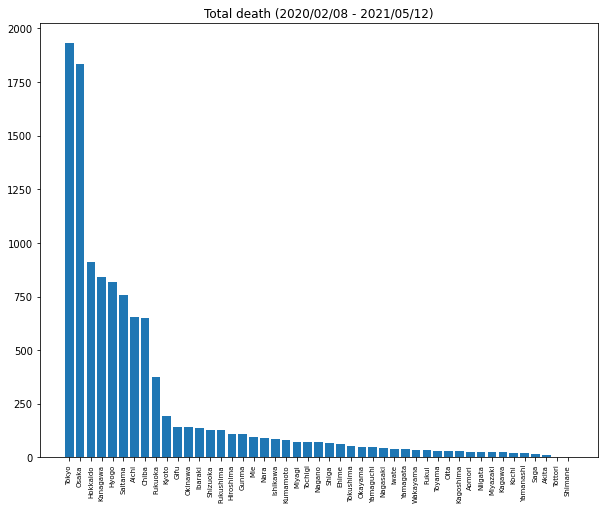

In [ ]:
ltd_df = jp_df[["Pref", "死亡数"]].groupby(level=0).last() # 各県死亡数の最終日のデータだけで構成されたデータフレーム
ltd_df = ltd_df.set_index("Pref") # 英語の県名をインデックス（行名）に指定
ltd_df = ltd_df.sort_values("死亡数", ascending=False) # 死亡数の大きい順（降順: descending）に並べ直す
fig = plt.figure(figsize=(10,8)) # 少し大きめの図を用意
plt.bar(ltd_df.index, ltd_df["死亡数"]) # 大きい順に並べた死亡数を棒グラフでプロット
ax = plt.gca() # 表示中の軸を取得
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=7) # 副目盛りラベルを45度回転させる
first_date_str = jp_df.index[0][1].strftime("%Y/%m/%d") # データ取得開始日
last_date_str =  jp_df.index[-1][1].strftime("%Y/%m/%d") # 最新データ取得日
plt.title("Total death (%s - %s)" % (first_date_str, last_date_str))
plt.show() # グラフの描画

# 週間成長率
各県の感染がどれだけの勢いで拡大しているかを把握するには「1週間あたりででどれだけ増加したか(=週間成長率)」を分析するのがよさそうだ．$d$日目の件数（陽性数/死亡数）を$X(d)$とすれば，週間成長率は，以下の式で定義できる：
$$
r(d) = \frac{X(d)-X(d-7)}{X(d-7)}
$$

ここで，分子の$X(d)-X(d-7)$，すなわち「7日間の増分」は，[`diff`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)の引数に`7`を与えることで計算でき，分母の$X(d-7)$，すなわち「7日前の値」は[`shift`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)の引数に`7`を与えることで求められる．例えば，陽性数を格納するデータフレーム`conf`に対しては，
- `conf.diff(7)` : 7日間の増分
- `conf.shift(7)` : 7日前の値
- `conf.diff(7)/conf.shift(7)` : 週間成長率

と計算できる．

以下のセルを実行すれば，指定した県の陽性数と死亡数についての週次成長率をプロットできる．

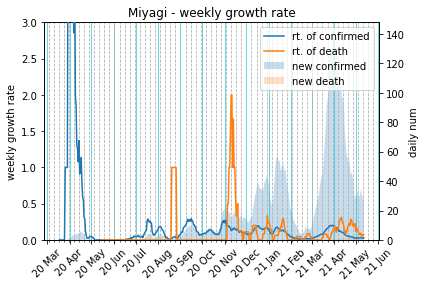

In [ ]:
# 県別データフレームを構成
pref = "宮城県"
pref_df = jp_df.loc[pref] # 当該県データのみのデータフレームを構築
# 陽性数と死亡数を取得
conf = pref_df["陽性数"] # 陽性と確定した者(confirmed)
dead = pref_df["死亡数"] # 死亡者(dead)

# 第1軸に週間成長率をプロットする
plt.plot(conf.diff(7)/conf.shift(7), label="rt. of confirmed", zorder=10)
plt.plot(dead.diff(7)/dead.shift(7), label="rt. of death", zorder=10)
ax1 = plt.gca() # 現在表示中の軸を x1軸とする
ax1.set_ylabel("weekly growth rate")
ax1.set_ylim((0,3)) # y1軸の表示範囲を0〜3(0〜300%)とする

# 第2軸に日次新規件数をプロットする
ax2 = plt.twinx(ax1) # 第2軸を用意する
W = 7 # 移動平均を取る日数
ax2.fill_between(conf.index, conf.diff().rolling(W).mean(), label="new confirmed", alpha=0.25, zorder=1) # 陽性者
ax2.fill_between(dead.index, dead.diff().rolling(W).mean(), label="new death", alpha=0.25, zorder=1) # 死亡者
ax2.set_yscale('linear') # y2軸を線形軸で表示
ax2.set_ylim(0,) # y2軸の表示下限を0にする
ax2.set_xticks([]) # x2軸は表示しない
ax2.set_ylabel("daily num")

# y1軸をy2軸の上に表示させる
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
ax1 = fancy_ax(ax1) # ｘ1軸の見栄えを整える

# グラフのタイトルと凡例を表示
plt.title(pref_df["Pref"][0] + " - weekly growth rate") # "Pref"列の第0要素（先頭要素）をタイトルとして表示
h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
ax1.legend(h1+h2, l1+l2, loc='upper right') # ax1軸とax2軸の凡例を一緒に出力するおまじない
plt.show()

## 複数の県のデータを一度にプロット
今回の講義では詳細な解説は省くが，`for`を使った繰り返しと [`pyplot.subplot`関数](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html)を組み合わせることで，複数の県のデータをタイル状に並べてプロットできる．プログラムを学ぶことで，こうした繰り返しをミス無く容易に行えるようになる．

次のセルは，いくつかの県と，全国集計値についてのグラフをタイル状に配置している．47都道府県全てのデータをプロットするには，最初の行にある`pref_set`の定義を
```python
pref_set = ["全国"] + jp_df.xs(jp_df.index[0][1], level=1).index.to_list()
```
に置き換えればよい．

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


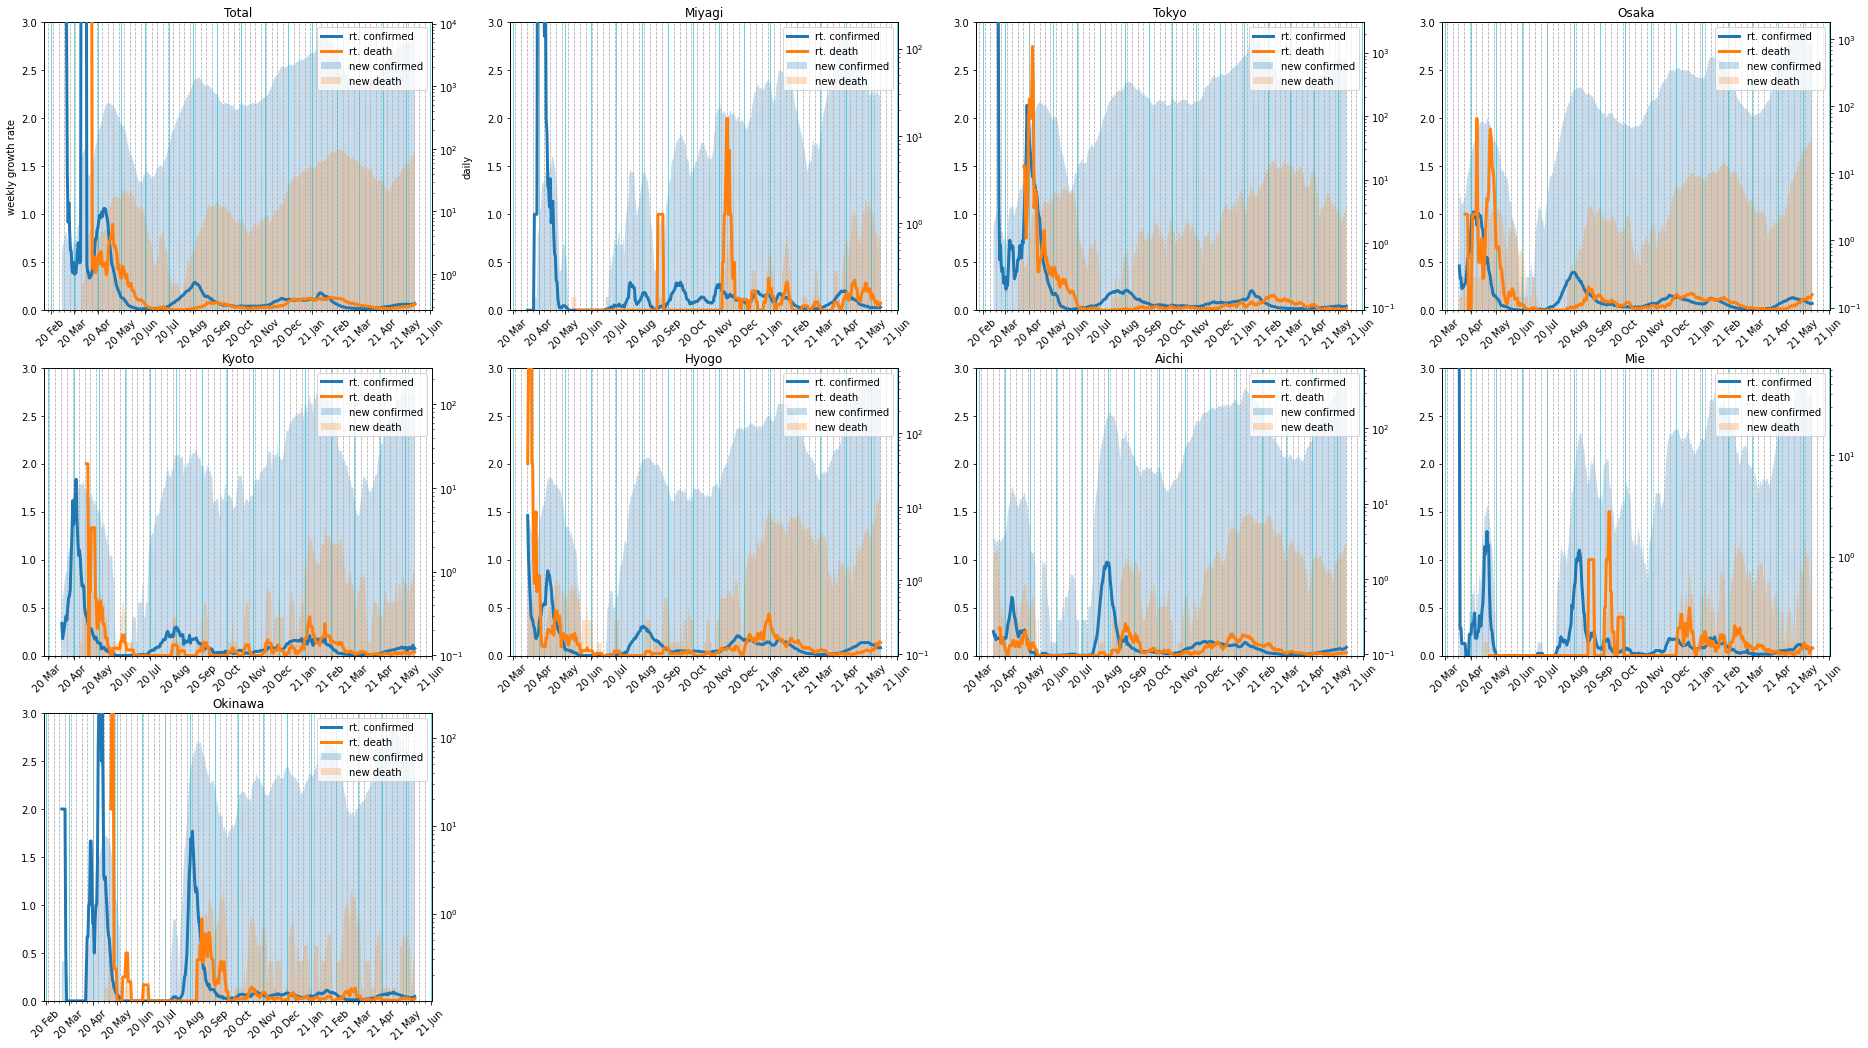

In [ ]:
pref_set = ["全国", "宮城県", "東京都", "大阪府", "京都府", "兵庫県", "愛知県", "三重県", "沖縄県"] # 表示する県名のリスト
W = 7 # 移動平均を取る日数
cols = 4 # 1行に表示するタイルの数（列数）
rows = np.ceil(len(pref_set)/cols) # タイルの行数

fig = plt.figure( figsize=(8*cols, 6*rows) ) # タイル数に応じた大きさの figure オブジェクトを用意

for (pid, pref) in enumerate(pref_set): # enumerate を使うことで，県名 pref と同時に「何番目の図か」を表すインデックス pid を得ている
    # 県別データフレームを構成
    if pref == "全国": # 県名に"全国"が指定された場合は，各日について全県の和をとったものをデータフレームとする
        pref_df = jp_df.groupby(level=1).sum()
        pref_df["Pref"] = "Total"
    else:
        pref_df = jp_df.loc[pref] # 当該県データのみのデータフレームを構築

    # 陽性数と死亡数を取得
    conf = pref_df["陽性数"] # 陽性と確定した者(confirmed)
    dead = pref_df["死亡数"] # 死亡者(dead)
    
    # add_subplot を使って複数の図をタイル状に配置
    ax1 = fig.add_subplot(rows, cols, pid+1)

    # 第1軸に週間成長率をプロットする
    ax1.plot(conf.diff(7)/conf.shift(7), label="rt. confirmed", zorder=10, linewidth=3)
    ax1.plot(dead.diff(7)/dead.shift(7), label="rt. death", zorder=10, linewidth=3)
    ax1.set_ylim(0,3) # y1軸の表示範囲を 0〜3に設定

    # 第2軸に日次新規件数をプロットする
    ax2 = plt.twinx(ax1) # 第2軸を用意する
    ax2.fill_between(conf.index, conf.diff().rolling(W).mean(), label="new confirmed", alpha=0.25, zorder=1) # 陽性者
    ax2.fill_between(dead.index, dead.diff().rolling(W).mean(), label="new death", alpha=0.25, zorder=1) # 死亡者
    ax2.set_yscale('log') # y2軸を線形軸で表示
    ax2.set_ylim(0,) # y2軸の表示下限を0にする
    ax2.set_xticks([]) # x2軸は表示しない
    
    # 最初の図だけ y1/y2軸ラベルを付ける
    if pid == 0:
        ax1.set_ylabel("weekly growth rate") # y1軸ラベル
        ax2.set_ylabel("daily") # y2軸ラベル
        
    # y1軸をy2軸の上に表示させる
    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)
    ax1 = fancy_ax(ax1) # ｘ軸の見栄えを整える

    # グラフのタイトルと凡例を表示
    ax1.set_title(pref_df["Pref"][0]) # "Pref"列の第0要素（先頭要素）をタイトルとして表示
    h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
    h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
    ax1.legend(h1+h2, l1+l2, loc='upper right') # ax1軸とax2軸の凡例を一緒に出力するおまじない

plt.show()

# K値（週間後方成長率）
[Nakano and Ikeda (2020)](https://www.jmir.org/2020/11/e20144/)および[中野・池田(2020)](http://www.rcnp.osaka-u.ac.jp/~nakano/note2.pdf)は，CoVid-19の感染状況の短期予測に，以下で定義される**K値**が有用であることを示している(\*3)：
$$
K(d) = \frac{X(d)-X(d-7)}{X(d)}
$$

上でプロットした週次成長率との違いは，分母が$X(d-7)$でなく$X(d)$であることだ（週間後方成長率とでも言おうか）．これにより，$K(d)$の値が常に0から1の間に収まるため，対象とする国や地域によらず，同じモノサシで分析が可能となる．ここまでの知識を使えば，K値は容易に計算できる．例えば，陽性数を格納するデータフレーム`conf`に対しては，以下のように計算できる：
- `conf.diff(7)` : 7日間の増分
- `conf.shift(7)` : 7日前の値
- `conf.diff(7)/conf.shift(7)` : 週間成長率
- `conf.diff(7)/conf` : K値（週間後方成長率）

以下のセルを実行すれば，指定した県の陽性数と死亡数についてのK値をプロットできる．

----

\*3 正しくは，これらの研究の重要な貢献は，**reference date と呼ばれる日（例えば4月1日）より前の累積陽性者数を除外する** ことで対象期間を感染縮小期に限定するとき，観測されるK値が，国や地域によらず，経過日数の線形関数で近似し得ることを示した点にある．本講義では，reference dateを設けず，単に報告開始日（3月11日）からの累積件数についてのみ計算している点には注意されたい．

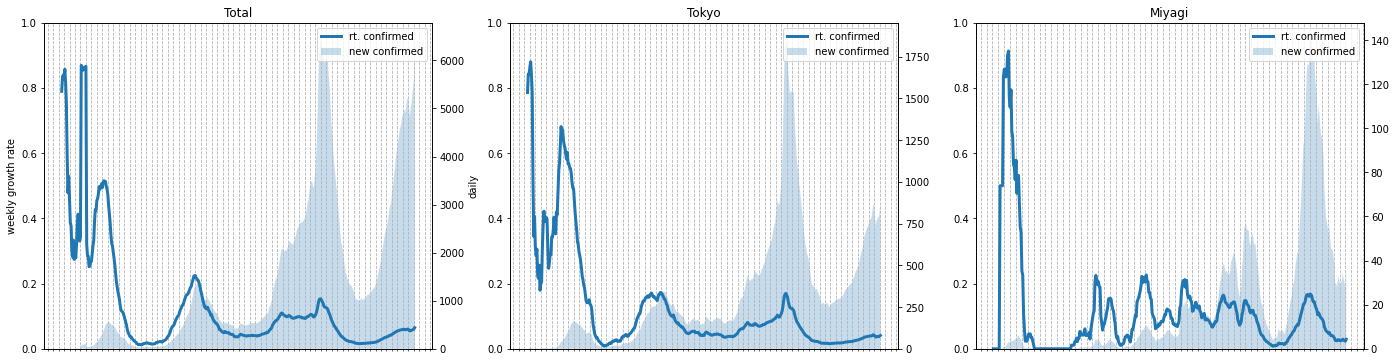

In [ ]:
pref_set = ["全国", "東京都", "宮城県"] # 表示する県名のリスト
W = 7 # 移動平均を取る日数
cols = 4 # 1行に表示するタイルの数（列数）
rows = np.ceil(len(pref_set)/cols) # タイルの行数

fig = plt.figure( figsize=(8*cols, 6*rows) ) # タイル数に応じた大きさの figure オブジェクトを用意

for (pid, pref) in enumerate(pref_set): # enumerate を使うことで，県名 pref と同時に「何番目の図か」を表すインデックス pid を得ている
    # 県別データフレームを構成
    if pref == "全国": # 県名に"全国"が指定された場合は，各日について全県の和をとったものをデータフレームとする
        pref_df = jp_df.groupby(level=1).sum()
        pref_df["Pref"] = "Total"
    else:
        pref_df = jp_df.loc[pref] # 当該県データのみのデータフレームを構築

    # 陽性数と死亡数を取得
    conf = pref_df["陽性数"] # 陽性と確定した者(confirmed)
    dead = pref_df["死亡数"] # 死亡者(dead)
    
    # add_subplot を使って複数の図をタイル状に配置
    ax1 = fig.add_subplot(rows, cols, pid+1)

    # 第1軸にK値（週間後方成長率）をプロットする
    ax1.plot(conf.diff(7)/conf, label="rt. confirmed", zorder=10, linewidth=3)
    #ax1.plot(dead.diff(7)/dead, label="rt. death", zorder=10, linewidth=3)
    ax1 = fancy_ax(ax1) # ｘ軸の見栄えを整える
    ax1.set_ylim((0,1)) # y1軸の表示範囲を[0,1]に固定する

    # 第2軸に日次新規件数をプロットする
    ax2 = plt.twinx(ax1) # 第2軸を用意する
    ax2.fill_between(conf.index, conf.diff().rolling(W).mean(), label="new confirmed", alpha=0.25, zorder=1) # 陽性者
    #ax2.fill_between(dead.index, dead.diff().rolling(W).mean(), label="new death", alpha=0.25, zorder=1) # 死亡者
    ax2.set_yscale('linear') # y2軸を線形軸で表示
    ax2.set_ylim(0,) # y2軸の表示下限を0にする
    ax2.set_xticks([]) # x2軸は表示しない
    
    # 最初の図だけ y1/y2軸ラベルを付ける
    if pid == 0:
        ax1.set_ylabel("weekly growth rate") # y1軸ラベル
        ax2.set_ylabel("daily") # y2軸ラベル
        
    # y1軸をy2軸の上に表示させる
    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)

    # グラフのタイトルと凡例を表示
    plt.title(pref_df["Pref"][0]) # "Pref"列の第0要素（先頭要素）をタイトルとして表示
    h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
    h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
    ax1.legend(h1+h2, l1+l2, loc='upper right') # ax1軸とax2軸の凡例を一緒に出力するおまじない

plt.show()

# 入院者・重症者の推移

新規感染者のうち何割かが入院治療を必要とし，さらにその一部が重症化し，さらにその一部が死亡する(入院治療/集中治療が行なわれる前に亡くなるケースももちろんあるが）と考えるのが自然であろう． 変異株によって症状が悪化する/死亡する確率が上昇するか否かは，陽性者，入院者，重症者，死亡者のそれぞれについて，日次ベースでの増減の割合が極端に変化しているか否かを分析することで判定できるのではないだろうか．

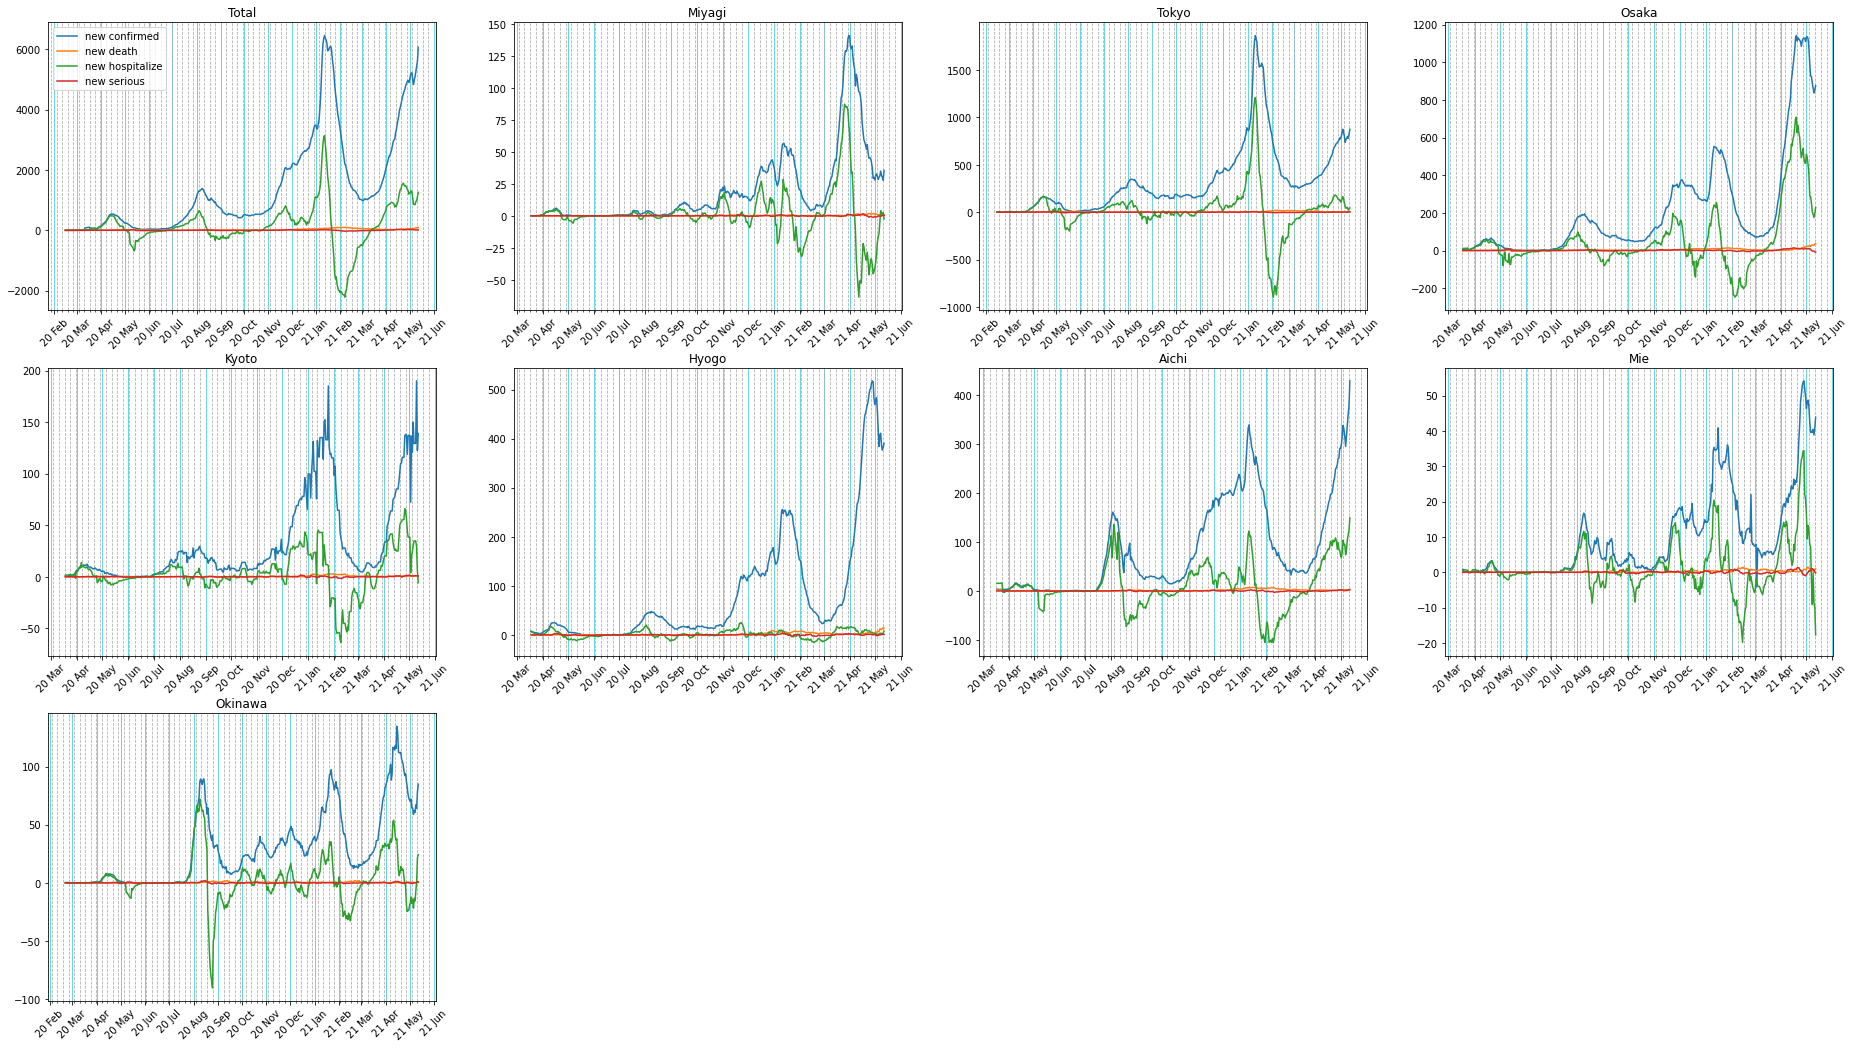

In [ ]:
pref_set = ["全国", "宮城県", "東京都", "大阪府", "京都府", "兵庫県", "愛知県", "三重県", "沖縄県"] # 表示する県名のリスト
W = 7 # 移動平均を取る日数
cols = 4 # 1行に表示するタイルの数（列数）
rows = np.ceil(len(pref_set)/cols) # タイルの行数

fig = plt.figure( figsize=(8*cols, 6*rows) ) # タイル数に応じた大きさの figure オブジェクトを用意

for (pid, pref) in enumerate(pref_set): # enumerate を使うことで，県名 pref と同時に「何番目の図か」を表すインデックス pid を得ている
    # 県別データフレームを構成
    if pref == "全国": # 県名に"全国"が指定された場合は，各日について全県の和をとったものをデータフレームとする
        pref_df = jp_df.groupby(level=1).sum()
        pref_df["Pref"] = "Total"
    else:
        pref_df = jp_df.loc[pref] # 当該県データのみのデータフレームを構築

    # 入院者数と重症者を取得
    conf = pref_df["陽性数"] # 陽性と確定した者(confirmed)
    dead = pref_df["死亡数"] # 死亡者(dead)
    hosp = pref_df["入院数"] # 陽性と確定した者(confirmed)
    serious = pref_df["重症数"] # 死亡者(dead)
    
    # add_subplot を使って複数の図をタイル状に配置
    ax1 = fig.add_subplot(rows, cols, pid+1)
    ax1.plot(conf.diff().rolling(W).mean(), label="new confirmed")
    ax1.plot(dead.diff().rolling(W).mean(), label="new death")
    ax1.plot(hosp.diff().rolling(W).mean(), label="new hospitalize")
    ax1.plot(serious.diff().rolling(W).mean(), label="new serious")
#    ax1.set_yscale('log')
    ax1.set_title(pref_df["Pref"][0])
    fancy_ax(ax1)
    if pid == 0:
        ax1.legend()
#fig.savefig('')